# Making fewer connections

If the complete graph is a representation of complete mixing, how do we represent "incomplete" mixing? With an *incomplete* graph, obviously...

Of course while there can only be one complete graph with a given number of nodes, once we start talking about incomplete graphs we have a huge number of options. We could have a network with *no* edges. (How would an epidemic spread over this network?) Or we could have a network that had a very uneven distribution of edges. Perhaps we could even extract a "real" social network from facebook or Twitter data.

The structure of a network is referred to mathematically as its **topology**. You can think of this as being "the way it's connected" What we're talking about, then, is exploring how the SIR process spreads over networks with different topologies.

## Characterising a network's topology

```{margin}
In the networks we'll be considering for now the degree of a node is fixed when the network is created. Later on when we encounter adaptive networks degree itself becomes a process that changes with time.
```

Since we have a range of different topologies, we'll need some way of describing their properties so thhat we can tell them apart. There are a huge number of such **graph metrics** that have been developed, and we'll encounter a few them in the course of this book. For the time being, we'll start with the most influential number, the **degree** of a node, which is simply the number of edges intersecting each node. Each node has its own degree. In your social network, the degree of the node that represents you is simply the number of people you're connected to. The degree of a node is usually denoted $k$, for no particular reason.

```{margin}
$\langle k \rangle$ is usually pronounced "k mean".
```

For a given network we can enumerate the degrees of every node, but that's clearly not going to be very useful for a large network: you wouldn't be able to extract any useful information from the large list of numbers. But we can derive two statistics from suchh lists. The first is the **mean degree**, the "average" degree of a node, denoted $\langle k \rangle$. While the degree of every node has to be an integer (you can't have half a friend), the mean degree of the population overall will typically be a real number.

For the complete graph every node has exactly the same degree, being one less that the number of nodes in the network, since there's an edge between every node and every other (except itself). This means that $k$ is always $(N - 1)$ for every node, and therefore so is $\langle k \rangle$.

```{margin}
If this use of the word "distribution" sounds like it should be connected to probability theory &ndash; it is. The degree histogram is a shows the relative numbers of nodes with each different degree, and so defines the probability of randomly choosing a node with degree $k$. $\langle k \rangle$ is then the expected value of the degree.
```

In general things will be more complicated. The degrees of nodes in a network form a **degree distribution**, which we can plot as a histogram to show the number of nodes with each degree (we do this below). If we use $N$ to represent the number of nodes in the network, we'll use $N_k$ to represent the number of nodes with degree $k$. Then we can compute $\langle k \rangle$ very easily from this distibution, by summing up the numbers of ndoes with each degree and then dividing by the number of nodes.

$$
    \langle k \rangle = \frac{\sum_k N_k}{N}
$$

There are a lot of other metrics that we could consider, but the degree distribution is the most important and well-studied. It's not the whole story, however, because there are will be a *lot* of different networks with the *same* degree distribution and mean degree, depending on exactly how the edges trhat intersect each node connect to other nodes. So while one side of network toppology is captured by statistics, there's another side that concerns the details of which nodes are **adjacent** to each other by having an edge between them: it matters who your friends are, not just how many you have. We sometimes call the set of nodes adjacent to a node its **neighbours**.

## ER networks

```{margin}
Paul Erd&#337;s (pronounced "AIR-dish") was the most prolific mathematician of the 20th
century. A peripatetic genius, he owned essentially nothing and
travelled between university mathematics schools seeking problems to work on.
His biography {cite}`Hof98` provides a fascinating insight into mathematical life.
Alfred R&eacute;nyi was a noted mathematician whose other work has been
rather overshadowed by his wonderfully productive association with
Erd&#337;s. He was also responsible for the definition of a mathematician as
"a machine for turning coffee into theorems".
```
Let's start with one of the simplest non-complete topologies. This topology was initially explored in depth in the late 1950's by Paul Erd&#337;s and Alfred R&eacute;nyi {cite}`ER59`. They called their approach "random graphs", but that's a slightly misleading name: we can produce "random" networks with *any* topology as we saw above. Fortunately the influence of Erd&#337;s and R&eacute;nyi has been so profound that networks of this type are now referred to as **Erd&#337;s-R&eacute;nyi** or **ER networks**.

The idea of an ER network is that there exists an edge between any pair of nodes with some fixed probability, and the existence of any edge is independent of the existence of any other.

(sec:er-building)=
### Building ER networks

```{margin}
Again, in the literature $p_{edge}$ is usually denoted $\phi$.
```
From this simple description of the degree distribution, an ER network is also very simple to build. Pick a number of nodes $N$, and build the complete graph $K_N$. Remember that the complete graph has an edge between every pair of nodes. Now pick a parameter $p_{edge}$ between $0$ and $1$. Work through all the edges, and for each edge pick a random number $s$ between $0$ ands $1$. If $s \le p_{edge}$ then keep the edge; if $s \gt p_{edge}$, remove it. You'll end up with a network in which there's an edge between each pair of nodes with a probability $p_{edge}$. If $p_{edge} = 1$ we have the complete graph (we *always* keep an edge); if $p_{edge} = 0$ we have the empty graph (we *never* keep an edge); and for values in between we have a more or less sparse collection of edges.

Drawing the result can help get the idea straight.

In [1]:
import networkx

import matplotlib
%matplotlib inline
%config InlineBackend.figure_formats = {'svg', 'png'}
import matplotlib.pyplot as plt
import seaborn
matplotlib.style.use('seaborn')

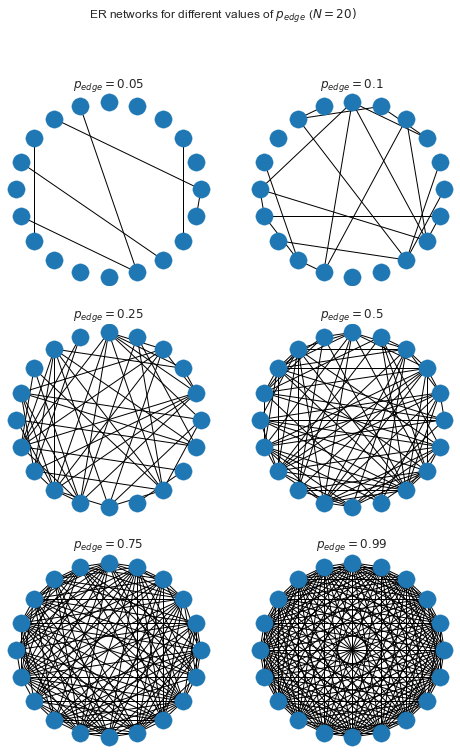

In [2]:
(fig, axs) = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(8, 12))

# a small network to visualise
N = 20

# draw the network for different values of phi
for (phi, ax) in [ (0.05, axs[0][0]),
                   (0.10, axs[0][1]),
                   (0.25, axs[1][0]),
                   (0.50, axs[1][1]),
                   (0.75, axs[2][0]),
                   (0.99, axs[2][1]) ]:
    # create a random ER network
    G = networkx.erdos_renyi_graph(N, phi)
    
    # draw the network in the sub-plot
    networkx.draw_circular(G, ax=ax)
    ax.set_title('$p_{edge} = ' + '{p}$'.format(p=phi))
        
# fine-tune the figure
plt.suptitle('ER networks for different values of $p_{edge}$ ' + '($N = {n})$'.format(n=N))
plt.show()

```{margin}
We sometimes denote the ER network with $N$ nodes and a connection probability $p_{edge}$ by $G_{N, p_{edge}}$.
```

At the top left where $p_{edge}$ is small, we have very few edges: 5% of the possible total, in fact. As we progress towards the bottom right the network gets more and more dense, until at 99% of the possible edges it's quite hard to spot that any are actually missing at all.

What is $\langle k \rangle$ for this topology? The answer turns out to be quite simple. An ER network has $\langle k \rangle = \frac{p_{edge}}{N}$. Moreover the degree distribution &ndash; the number of nodes with more, or less, edges than the mean, is a **normal** distribution, the "bell curve" we see in many phenomena.

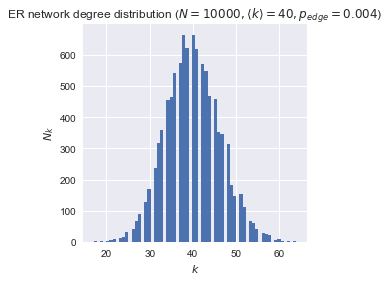

In [3]:
fig = plt.figure(figsize=(4, 4))
ax = fig.gca()

# a sample network
N = 10000
kmean = 40
phi = (kmean + 0.0) / N

# build the network
g = networkx.gnp_random_graph(N, phi)
#G = networkx.erdos_renyi_graph(N, phi)

# draw the degree distribution
ks = list(dict(networkx.degree(g)).values())
ax.hist(ks, bins=max(ks))
ax.set_title('ER network degree distribution ($N = {n}, \\langle k \\rangle = {k}'.format(n=N, k=kmean) + ', p_{edge} = ' + '{p}$)'.format(p=phi))
ax.set_xlabel('$k$')
ax.set_ylabel('$N_k$')

plt.savefig('degree-distribution-er.svg')
plt.show()

So about one-third of the nodes (about 34000) have a degree around the mean (20), with the number of nodes having more (or less) neighbours dropping off on either side of the mean. There are very few nodes with degrees in single figures, and very few with degrees of twice the mean &ndash; and none with really large degree. In fact for any network there will be a **minimum degree** $k_{min}$ and a **maximum degree** $k_{max}$. The ER network's degree distribution says that the maximum degree is never "too far" from the mean. 

(sec:er-spreading)=
## Epidemic spreading on ER networks

```{margin}
From now on we'll mainly use $\langle k \rangle$ as the parameter for ER networks rather than $\phi$: we can convert between them easily, and $\langle k \rangle$ is a more intuitive idea.
```

After all that network science we can finally ask ourselves a disease-related question: what happens as we vary $\langle k \rangle$? We already know that when $\langle k \rangle = (N - 1)$ the network has complete mixing. But what happens as $\langle k \rangle$ gets *smaller* &ndash; that is, people have fewer and fewer contacts with each other &ndash; for the *same* disease? We'd presumably expect that fewer people will become infected overall, which also suggests that at some point the disease will simply die out without affecting very many people at all.

Let's see.

We'll take the same parameters for the size of the network and the disease that we had before.

In [4]:
N = 2000
T = 5000
pInfected = 0.01
pInfect = 0.0001
pRemove = 0.001

But instead of building a complete graph we'll build ER networks and see what happens as we change $\langle k \rangle$. 

In [5]:
import epydemic

In [6]:
class MonitoredSIR(epydemic.SIR, epydemic.Monitor):
    '''A monitored epidemic.'''''
 
    def __init__(self):
        super(MonitoredSIR, self).__init__()
        
    def build(self, params):
        '''Build the observation process.
        
        :param params: the experimental parameters'''
        super(MonitoredSIR, self).build(params)

        # also monitor other compartments
        self.trackNodesInCompartment(epydemic.SIR.SUSCEPTIBLE)
        self.trackNodesInCompartment(epydemic.SIR.REMOVED)

In [7]:
def network_sir(T, g, pInfected, pInfect, pRemove):
    # create the simulator
    m = MonitoredSIR()
    m.setMaximumTime(T)
    e = epydemic.SynchronousDynamics(m, g)

    # set the simulation parameters
    param = dict()
    param[epydemic.SIR.P_INFECTED] = pInfected
    param[epydemic.SIR.P_INFECT] = pInfect
    param[epydemic.SIR.P_REMOVE] = pRemove
    param[epydemic.Monitor.DELTA] = T / 50          # take 50 samples
    
    # run the simulation
    rc = e.set(param).run()
    
    # extract the time series
    results = e.experimentalResults()[MonitoredSIR.TIMESERIES]
    ts = results[MonitoredSIR.OBSERVATIONS]
    sss = results[epydemic.SIR.SUSCEPTIBLE]
    iss = results[epydemic.SIR.INFECTED]
    rss = results[epydemic.SIR.REMOVED]

    # return the time series
    return(ts, sss, iss, rss)

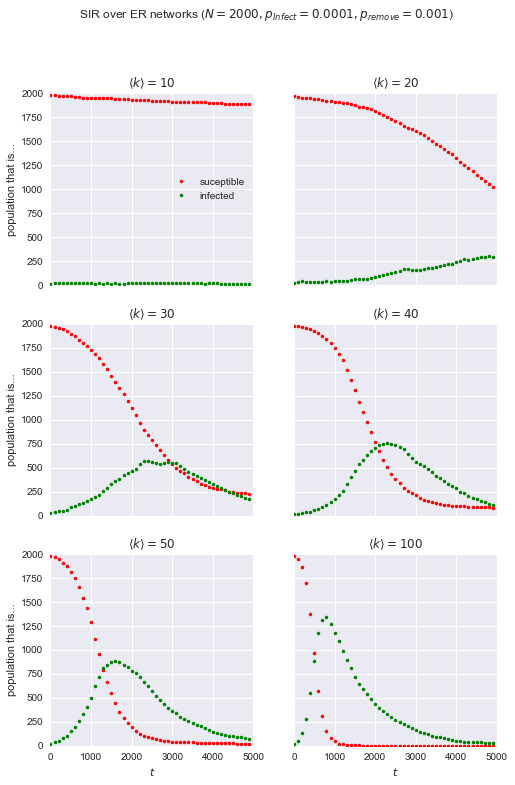

In [8]:
(fig, axs) = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(8, 12))

# draw sub-plots for the different values of kmean 
for (kmean, ax) in [ (10,  axs[0][0]),
                     (20,  axs[0][1]),
                     (30,  axs[1][0]),
                     (40,  axs[1][1]),
                     (50,  axs[2][0]),
                     (100, axs[2][1]) ]:
    # create an ER network
    phi = (kmean + 0.0) / N
    g = networkx.gnp_random_graph(N, phi)
    
    # run the corresponding simulation
    (sim_ts, sim_sss, sim_iss, sim_rss) = network_sir(T, g, pInfected, pInfect, pRemove)
    ax.plot(sim_ts, sim_sss, 'r.', label='suceptible')
    ax.plot(sim_ts, sim_iss, 'g.', label='infected')
    ax.set_title('$\\langle k \\rangle = {k}$'.format(k=kmean))
    ax.set_xlim([0, T])
    ax.set_ylim([0, N])
        
# fine-tune the figure
plt.suptitle('SIR over ER networks ($N = {n}'.format(n=N) + ', p_{\\mathit{Infect}} = ' + '{b:.4f}'.format(b=pInfect) + ', p_{remove} = ' + '{a}$)'.format(a=pRemove))
for i in [0, 1, 2]:
    axs[i][0].set_ylabel('population that is...')
for i in[0, 1]:
    axs[2][i].set_xlabel('$t$')
axs[0][0].legend(loc='center right')
plt.show()

Compare these graphs to the ones {ref}`earlier <sec:network-complete>` and you'll see the same shapes: changing $\langle k \rangle$ has the same effect as changing $p_{\mathit{infect}}$ in terms of moving the peak of infections.

## Questions for discussion

- In a network model two people are either connected, or they aren't. Is that realistic? Could we change our model to make it reflect different "strengths of connection"? What might that let us do? 
- We say above that "changing $\langle k \rangle$ has the same effect as changing $p_{\mathit{infect}}$". Can you put that in less mathematical terms? What does it mean?